# COVID-19 - Previsões

- Link Kaggle: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Importação das bibliotecas

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploração das bases de dados

## Covid-19

In [ ]:
covid = pd.read_csv('covid_19_data.csv')

In [ ]:
covid.shape

(9117, 8)

In [ ]:
covid.head()

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01/22/2020          Anhui  ...       1.0    0.0        0.0
1    2      01/22/2020        Beijing  ...      14.0    0.0        0.0
2    3      01/22/2020      Chongqing  ...       6.0    0.0        0.0
3    4      01/22/2020         Fujian  ...       1.0    0.0        0.0
4    5      01/22/2020          Gansu  ...       0.0    0.0        0.0

[5 rows x 8 columns]

In [ ]:
df_brasil = covid[covid['Country/Region'] == 'Brazil']
df_brasil.shape

(31, 8)

In [ ]:
df_brasil.head(31)

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
82      83      01/23/2020            NaN  ...       0.0    0.0        0.0
2455  2456      02/26/2020            NaN  ...       1.0    0.0        0.0
2559  2560      02/27/2020            NaN  ...       1.0    0.0        0.0
2668  2669      02/28/2020            NaN  ...       1.0    0.0        0.0
2776  2777      02/29/2020            NaN  ...       2.0    0.0        0.0
2903  2904      03/01/2020            NaN  ...       2.0    0.0        0.0
3032  3033      03/02/2020            NaN  ...       2.0    0.0        0.0
3173  3174      03/03/2020            NaN  ...       2.0    0.0        0.0
3322  3323      03/04/2020            NaN  ...       4.0    0.0        0.0
3486  3487      03/05/2020            NaN  ...       4.0    0.0        0.0
3647  3648      03/06/2020            NaN  ...      13.0    0.0        0.0
3848  3849      03/07/2020            NaN  ...      13.0    0.0        0.0
4068  4069      03/08/2020            NaN  ...      20.0    0.0        0.0
4320  4321      03/09/2020            NaN  ...      25.0    0.0        0.0
4587  4588      03/10/2020            NaN  ...      31.0    0.0        0.0
4796  4797      03/11/2020            NaN  ...      38.0    0.0        0.0
5005  5006      03/12/2020            NaN  ...      52.0    0.0        0.0
5227  5228      03/13/2020            NaN  ...     151.0    0.0        0.0
5433  5434      03/14/2020            NaN  ...     151.0    0.0        0.0
5681  5682      03/15/2020            NaN  ...     162.0    0.0        0.0
5938  5939      03/16/2020            NaN  ...     200.0    0.0        1.0
6201  6202      03/17/2020            NaN  ...     321.0    1.0        2.0
6476  6477      03/18/2020            NaN  ...     372.0    3.0        2.0
6755  6756      03/19/2020            NaN  ...     621.0    6.0        2.0
7043  7044      03/20/2020            NaN  ...     793.0   11.0        2.0
7337  7338      03/21/2020            NaN  ...    1021.0   15.0        2.0
7637  7638      03/22/2020            NaN  ...    1546.0   25.0        2.0
7936  7937      03/23/2020            NaN  ...    1924.0   34.0        2.0
8231  8232      03/24/2020            NaN  ...    2247.0   46.0        2.0
8530  8531      03/25/2020            NaN  ...    2554.0   59.0        2.0
8832  8833      03/26/2020            NaN  ...    2985.0   77.0        6.0

[31 rows x 8 columns]

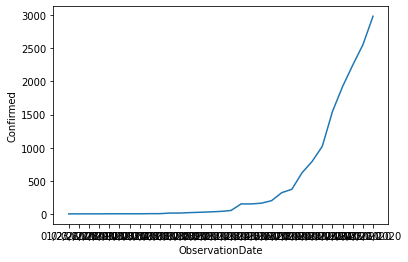

In [ ]:
sns.lineplot(df_brasil['ObservationDate'], df_brasil['Confirmed']);

In [ ]:
df_sum = covid.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

In [ ]:
df_sum.head()

ObservationDate  Confirmed  Deaths  Recovered
0      01/22/2020      555.0    17.0       28.0
1      01/23/2020      653.0    18.0       30.0
2      01/24/2020      941.0    26.0       36.0
3      01/25/2020     1438.0    42.0       39.0
4      01/26/2020     2118.0    56.0       52.0

In [ ]:
df_sum.tail()

ObservationDate  Confirmed   Deaths  Recovered
60      03/22/2020   337020.0  14623.0    97243.0
61      03/23/2020   378287.0  16497.0   100958.0
62      03/24/2020   417966.0  18615.0   107705.0
63      03/25/2020   467594.0  21181.0   113770.0
64      03/26/2020   529591.0  23970.0   122150.0

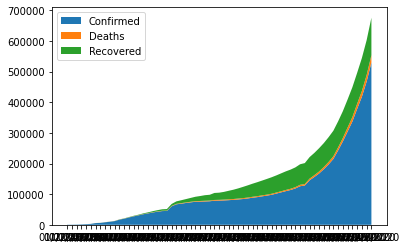

In [ ]:
plt.stackplot(df_sum['ObservationDate'], [df_sum['Confirmed'], df_sum['Deaths'], df_sum['Recovered']],
              labels = ['Confirmed', 'Deaths', 'Recovered'])
plt.legend(loc = 'upper left')

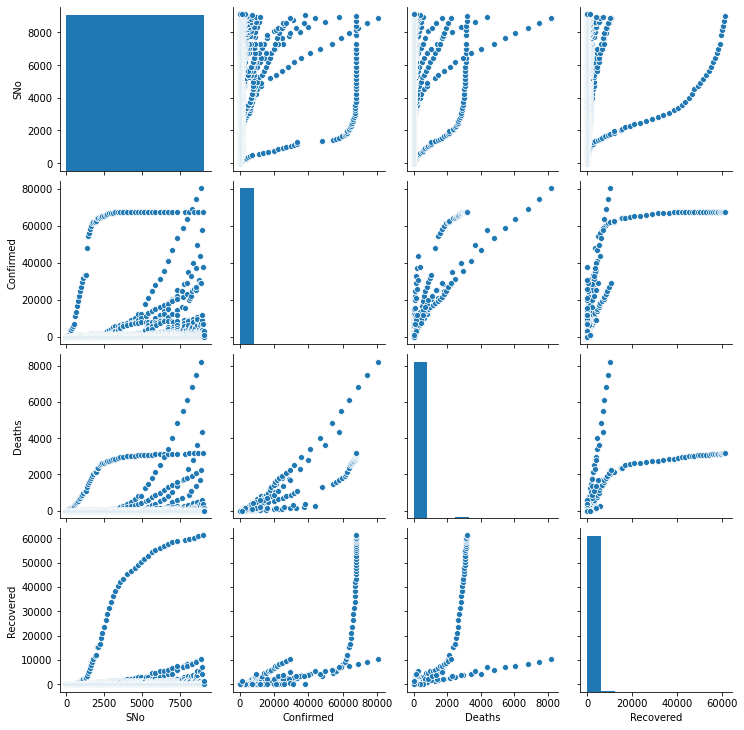

In [ ]:
sns.pairplot(covid)

## Covid-19 line_list_data

In [ ]:
line_list_df = pd.read_csv('/content/COVID19_line_list_data.csv')

In [ ]:
line_list_df.shape

(1085, 27)

In [ ]:
line_list_df.head(2)

id  case_in_country reporting date  ...  Unnamed: 24 Unnamed: 25 Unnamed: 26
0   1              NaN      1/20/2020  ...          NaN         NaN         NaN
1   2              NaN      1/20/2020  ...          NaN         NaN         NaN

[2 rows x 27 columns]

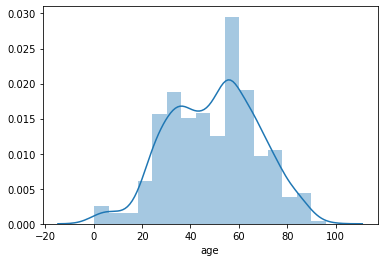

In [ ]:
sns.distplot(line_list_df['age'])

# Previsões de mortes por COVID-19

## Preparação da base de dados

- Preparação dos dados baseado em: https://www.kaggle.com/chaudharijay2000/prediction-of-death-and-confirmed-cases-covid-19

In [ ]:
deaths_df = pd.read_csv('/content/time_series_covid_19_deaths.csv')

In [ ]:
deaths_df.shape

(248, 69)

In [ ]:
deaths_df.head()

Province/State Country/Region      Lat  ...  3/24/20  3/25/20  3/26/20
0            NaN    Afghanistan  33.0000  ...        1        2        4
1            NaN        Albania  41.1533  ...        5        5        6
2            NaN        Algeria  28.0339  ...       19       21       25
3            NaN        Andorra  42.5063  ...        1        1        3
4            NaN         Angola -11.2027  ...        0        0        0

[5 rows x 69 columns]

In [ ]:
deaths_df.tail()

Province/State         Country/Region  ...  3/25/20  3/26/20
243                    NaN                   Mali  ...        0        0
244                    NaN  Saint Kitts and Nevis  ...        0        0
245  Northwest Territories                 Canada  ...        0        0
246                  Yukon                 Canada  ...        0        0
247                    NaN                 Kosovo  ...        0        1

[5 rows x 69 columns]

In [ ]:
deaths_df[deaths_df['Country/Region'] == 'Brazil']

Province/State Country/Region     Lat  ...  3/24/20  3/25/20  3/26/20
28            NaN         Brazil -14.235  ...       46       59       77

[1 rows x 69 columns]

In [ ]:
columns = deaths_df.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20'],
      dtype='object')

In [ ]:
deaths_df = deaths_df.loc[:, columns[4]:columns[-1]]

In [ ]:
deaths_df.head()

1/22/20  1/23/20  1/24/20  1/25/20  ...  3/23/20  3/24/20  3/25/20  3/26/20
0        0        0        0        0  ...        1        1        2        4
1        0        0        0        0  ...        4        5        5        6
2        0        0        0        0  ...       17       19       21       25
3        0        0        0        0  ...        1        1        1        3
4        0        0        0        0  ...        0        0        0        0

[5 rows x 65 columns]

In [ ]:
deaths_df.keys()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20'],
      dtype='object')

In [ ]:
len(deaths_df.keys())

65

In [ ]:
deaths_df['1/22/20'].sum()

17

In [ ]:
deaths_df['3/26/20'].sum()

23970

In [ ]:
dates = deaths_df.keys()
y = []
for i in dates:
  #print(i)
  y.append(deaths_df[i].sum())

In [ ]:
print(y)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2007, 2122, 2247, 2251, 2458, 2469, 2629, 2708, 2770, 2814, 2872, 2941, 2996, 3085, 3160, 3254, 3348, 3460, 3558, 3802, 3988, 4262, 4615, 4720, 5404, 5819, 6440, 7126, 7905, 8733, 9867, 11299, 12973, 14651, 16505, 18625, 21181, 23970]


In [ ]:
len(y)

65

In [ ]:
type(y)

list

In [ ]:
y = np.array(y).reshape(-1,1)

In [ ]:
y.shape

(65, 1)

In [ ]:
print(y)

[[   17]
 [   18]
 [   26]
 [   42]
 [   56]
 [   82]
 [  131]
 [  133]
 [  171]
 [  213]
 [  259]
 [  362]
 [  426]
 [  492]
 [  564]
 [  634]
 [  719]
 [  806]
 [  906]
 [ 1013]
 [ 1113]
 [ 1118]
 [ 1371]
 [ 1523]
 [ 1666]
 [ 1770]
 [ 1868]
 [ 2007]
 [ 2122]
 [ 2247]
 [ 2251]
 [ 2458]
 [ 2469]
 [ 2629]
 [ 2708]
 [ 2770]
 [ 2814]
 [ 2872]
 [ 2941]
 [ 2996]
 [ 3085]
 [ 3160]
 [ 3254]
 [ 3348]
 [ 3460]
 [ 3558]
 [ 3802]
 [ 3988]
 [ 4262]
 [ 4615]
 [ 4720]
 [ 5404]
 [ 5819]
 [ 6440]
 [ 7126]
 [ 7905]
 [ 8733]
 [ 9867]
 [11299]
 [12973]
 [14651]
 [16505]
 [18625]
 [21181]
 [23970]]


In [ ]:
X = np.arange(len(dates)).reshape(-1,1)

In [ ]:
X.shape

(65, 1)

In [ ]:
print(X)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]]


In [ ]:
forecast = np.arange(len(dates) + 10).reshape(-1,1)

In [ ]:
forecast.shape

(75, 1)

In [ ]:
print(forecast)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = False)

In [ ]:
X_test

array([[55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64]])

In [ ]:
y_test

array([[ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [18625],
       [21181],
       [23970]])

In [ ]:
X_train.shape

(55, 1)

In [ ]:
y_train.shape

(55, 1)

In [ ]:
X_test.shape

(10, 1)

In [ ]:
y_test.shape

(10, 1)

## Regressão polinomial

### Construção do modelo

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train_poly.shape

(55, 5)

In [ ]:
X_test_poly.shape

(10, 5)

In [ ]:
X_test_poly

array([[1.0000000e+00, 5.5000000e+01, 3.0250000e+03, 1.6637500e+05,
        9.1506250e+06],
       [1.0000000e+00, 5.6000000e+01, 3.1360000e+03, 1.7561600e+05,
        9.8344960e+06],
       [1.0000000e+00, 5.7000000e+01, 3.2490000e+03, 1.8519300e+05,
        1.0556001e+07],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 5.9000000e+01, 3.4810000e+03, 2.0537900e+05,
        1.2117361e+07],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 6.1000000e+01, 3.7210000e+03, 2.2698100e+05,
        1.3845841e+07],
       [1.0000000e+00, 6.2000000e+01, 3.8440000e+03, 2.3832800e+05,
        1.4776336e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07],
       [1.0000000e+00, 6.4000000e+01, 4.0960000e+03, 2.6214400e+05,
        1.6777216e+07]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Previsões

In [ ]:
poly_test_pred = regressor.predict(X_test_poly)
poly_test_pred

array([[ 7350.78519156],
       [ 7973.08182419],
       [ 8658.63972621],
       [ 9411.90406664],
       [10237.46099338],
       [11140.03763325],
       [12124.50209195],
       [13195.86345405],
       [14359.27178305],
       [15620.01812132]])

In [ ]:
y_test

array([[ 7905],
       [ 8733],
       [ 9867],
       [11299],
       [12973],
       [14651],
       [16505],
       [18625],
       [21181],
       [23970]])

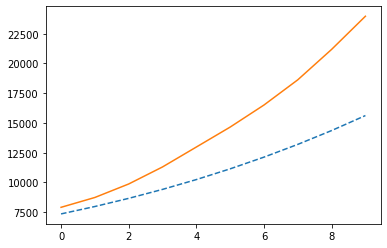

In [ ]:
plt.plot(poly_test_pred, linestyle = 'dashed')
plt.plot(y_test)

In [ ]:
print('MAE:', mean_absolute_error(poly_test_pred, y_test))
print('MSE:', mean_squared_error(poly_test_pred, y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_test_pred, y_test)))

MAE: 3563.743511439495
MSE: 19063838.449542377
RMSE: 59.697098015225954


In [ ]:
forecast.shape

(75, 1)

In [ ]:
X_train_all = poly.transform(forecast)
X_train_all.shape

(75, 5)

In [ ]:
poly_pred_all = regressor.predict(X_train_all)
len(poly_pred_all)

75

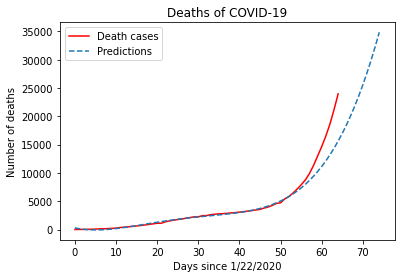

In [ ]:
plt.plot(forecast[:-10], y, color='red')
plt.plot(forecast, poly_pred_all, linestyle='dashed')
plt.title('Deaths of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases', 'Predictions']);